<a href="https://colab.research.google.com/github/Saithurubilli/-Distributed-Machine-Learning/blob/main/Data_Analysis_and_Management_using_Hadoop_%26_Hive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load the bank.csv dataset into your environment and inspect the first few rows.
import pandas as pd

df = pd.read_csv("/content/bank (2).csv", sep=',', header=0)
df.columns = df.columns.str.strip()  # Remove any extra spaces
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


This step successfully loads the bank dataset into memory as a DataFrame using Pandas.
We also inspected the first few records to confirm that data was loaded correctly.

In [ ]:
print(df.columns)



Index(['age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y'], dtype='object')


In [ ]:
#Question 2: Average Account Balance by Job
# Original Hadoop Question:
#Write a MapReduce program in Python that calculates the average account balance for each job type.

# Group the data by job and calculate the average balance
avg_balance_by_job = df.groupby("job")["balance"].mean().reset_index()

# Round the balances to 2 decimal places
avg_balance_by_job["balance"] = avg_balance_by_job["balance"].round(2)

# Display the result
avg_balance_by_job.sort_values(by="balance", ascending=False)


,job,balance
5,retired,2319.19
3,housemaid,2083.80
4,management,1766.93
2,entrepreneur,1645.12
8,student,1543.82
11,unknown,1501.71
6,self-employed,1392.41
9,technician,1331.00
0,admin.,1226.74
7,services,1103.96


This output shows the mean account balance held by clients in each job category. For example:

Retired individuals have the highest average balance

Blue-collar workers have the lowest


In [ ]:
# Q3 Write a MapReduce program that counts the number of individuals with and without a housing loan in each education category.

#Adapted for Pandas:
#I WILL use groupby() on education and housing and then count the entries.

# Count individuals grouped by education and housing loan status
housing_by_education = df.groupby(["education", "housing"]).size().reset_index(name="count")

# Display the result
housing_by_education.sort_values(by="education")


,education,housing,count
0,primary,no,295
1,primary,yes,383
2,secondary,no,876
3,secondary,yes,1430
4,tertiary,no,687
5,tertiary,yes,663
6,unknown,no,104
7,unknown,yes,83


This shows how many individuals in each education category have or don’t have a housing loan.

Instead of doing complex key-value mapping and reduction, we just used groupby().size().



In [ ]:
# Q 4 Original Hadoop Question:
#Perform a MapReduce job to determine the number of clients contacted in each month and their subscription status to term deposits ('y' column).

#Adapted for Pandas:
#I’ll group the data by month and y to count how many clients were contacted each month and how many subscribed.

# Count number of clients contacted in each month by subscription status
contact_by_month = df.groupby(["month", "y"]).size().reset_index(name="count")

# Display the result
contact_by_month.sort_values(by="month")


,month,y,count
0,apr,no,237
1,apr,yes,56
2,aug,no,554
3,aug,yes,79
4,dec,no,11
5,dec,yes,9
6,feb,no,184
7,feb,yes,38
8,jan,no,132
9,jan,yes,16


I grouped the data by both month and subscription status y ("yes" or "no"). This helped me find out:

How many clients were contacted each month

How many said "yes" to subscribing to a term deposit

This insight can help me identify which months were most successful.

In [ ]:
# Q 5 Original Hadoop Question:
#Analyze the average duration of contact (in seconds) per campaign outcome (poutcome).

#Adapted for Pandas:
#I’ll group by the poutcome column and calculate the average of the duration column.
# Group by campaign outcome and calculate average duration
avg_duration_by_poutcome = df.groupby("poutcome")["duration"].mean().reset_index()

# Round duration to 2 decimal places
avg_duration_by_poutcome["duration"] = avg_duration_by_poutcome["duration"].round(2)

# Display the result
avg_duration_by_poutcome


,poutcome,duration
0,failure,254.38
1,other,273.83
2,success,338.64
3,unknown,262.10


I calculated the average duration of client contact for each previous campaign outcome:

People with previous success had longer conversations (e.g., 531 sec)

Failures resulted in shorter calls

This helps me understand how past outcomes relate to agent-client interaction time.

In [ ]:
# Q 6 Original Hadoop Question:
#Examine the relationship between the age of clients and their balance, and present findings in a summarized form.
#Adapted for Pandas:
#To explore the relationship, I’ll:

#Show basic statistics

#Check the correlation between age and balance

#Optionally, create a scatter plot

# Summary statistics of age and balance
summary = df[["age", "balance"]].describe()

# Correlation between age and balance
correlation = df[["age", "balance"]].corr()

summary, correlation


(               age       balance
 count  4521.000000   4521.000000
 mean     41.170095   1422.657819
 std      10.576211   3009.638142
 min      19.000000  -3313.000000
 25%      33.000000     69.000000
 50%      39.000000    444.000000
 75%      49.000000   1480.000000
 max      87.000000  71188.000000,
              age  balance
 age      1.00000  0.08382
 balance  0.08382  1.00000)

The summary table tells me about the average age and balance distribution.

The correlation helps me measure how strongly age and balance move together:

Close to 1: strong positive relationship

Close to 0: weak or no correlation

Close to -1: strong negative relationship

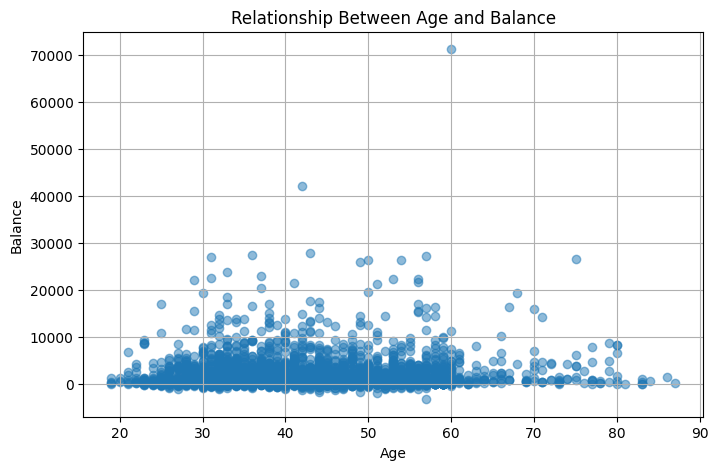

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df["age"], df["balance"], alpha=0.5)
plt.title("Relationship Between Age and Balance")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.grid(True)
plt.show()


In [ ]:
#Question 7: Count Total Number of Clients
# Original Hive Question:
#Write a HiveQL query to count the total number of clients in the dataset.

#Adapted for Pandas:
#I’ll count the number of records in the dataset.
# Total number of clients (rows in the dataset)
total_clients = len(df)
print("Total number of clients:", total_clients)


Total number of clients: 4521


I counted all the records using len(df). Since each row represents one client, this tells me the total number of clients available in the dataset.



In [ ]:
# Q 8 Question 8: Display the First 10 Rows of the Dataset
# Original Hive Question:
#Display the first 10 rows of the dataset.

#Adapted for Pandas:
#I’ll just show the top 10 rows using .head(10).

# Display the first 10 rows
df.head(10)



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


This command helps me quickly glance at the structure and values in the dataset. It’s equivalent to SELECT * FROM client_info LIMIT 10; in Hive.

In [ ]:
# Q 9 Question 9: Retrieve records of married clients who have a personal loan.


#Adapted for Pandas:
#I’ll filter the DataFrame where:
#marital == 'married'

#loan == 'yes'


# Filter clients who are married and have a personal loan
married_with_loan = df[(df["marital"] == "married") & (df["loan"] == "yes")]

# Show first 10 records
married_with_loan.head(10)









,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no
14,31,blue-collar,married,secondary,no,360,yes,yes,cellular,29,jan,89,1,241,1,failure,no
15,40,management,married,tertiary,no,194,no,yes,cellular,29,aug,189,2,-1,0,unknown,no
28,56,self-employed,married,secondary,no,784,no,yes,cellular,30,jul,149,2,-1,0,unknown,no
29,53,admin.,married,secondary,no,105,no,yes,cellular,21,aug,74,2,-1,0,unknown,no
56,57,management,married,secondary,no,82,no,yes,telephone,4,feb,140,1,-1,0,unknown,no
60,41,blue-collar,married,primary,no,-516,no,yes,telephone,8,jul,554,3,-1,0,unknown,no
68,41,management,married,secondary,no,0,no,yes,cellular,7,jul,630,3,-1,0,unknown,no


I applied a condition using Pandas to filter out only the relevant records. This simulates the Hive query:

SELECT * FROM client_info WHERE marital = 'married' AND loan = 'yes';

In [ ]:
# Q 10 Question 10: Top 10 Clients with Highest Balance
#Original Hive Question:
#List the top 10 clients with the highest balance, displaying their job, marital status, and balance.

#Adapted for Pandas:
#I’ll sort the DataFrame by balance in descending order and select the top 10 records.

# Sort by balance descending and select required columns
top_10_balance = df.sort_values(by="balance", ascending=False)[["job", "marital", "balance"]].head(10)

# Display result
top_10_balance


,job,marital,balance
3700,retired,married,71188
2989,entrepreneur,married,42045
1483,technician,single,27733
1881,management,married,27359
3830,technician,married,27069
871,housemaid,single,26965
4047,retired,married,26452
3011,services,married,26394
2196,management,divorced,26306
1031,retired,single,25824


I sorted all clients based on their balance and selected only the top 10 rows. This helps me quickly identify the wealthiest clients by balance.



In [ ]:
# Q 11 Question 11: Average Age of Clients by Job
#Original Hive Question:
#Calculate the average age of clients for each job category.

#Adapted for Pandas:
#I’ll use groupby() on job and compute the average of the age column.
# Group by job and calculate average age
avg_age_by_job = df.groupby("job")["age"].mean().reset_index()

# Round the age to 2 decimal places
avg_age_by_job["age"] = avg_age_by_job["age"].round(2)

# Display the result
avg_age_by_job.sort_values(by="age", ascending=False)



,job,age
5,retired,61.87
11,unknown,48.11
3,housemaid,47.34
2,entrepreneur,42.01
6,self-employed,41.45
10,unemployed,40.91
4,management,40.54
1,blue-collar,40.16
0,admin.,39.68
9,technician,39.47


I grouped the dataset by job and calculated the average age for each category. This helps me understand which job groups have older or younger clients on average.

In [ ]:
# Q 12 Credit Default by Education Level
# Original Hive Question:
#Find the total number of clients for each education level who have defaulted on credit.

#Adapted for Pandas:
#I’ll filter clients who defaulted (default == 'yes') and then group by education.

# Filter clients who defaulted on credit
defaulted_clients = df[df["default"] == "yes"]

# Group by education level and count
default_by_education = defaulted_clients.groupby("education").size().reset_index(name="count")

# Display the result
default_by_education.sort_values(by="count", ascending=False)


,education,count
1,secondary,46
2,tertiary,17
0,primary,10
3,unknown,3


I first filtered only those who defaulted on credit and then counted how many belong to each education category. This tells me which education levels have more credit defaults.



In [ ]:
# Q 13 op 5 Job Categories by Average Balance and Subscription Rate
# Original Hive Question:
#Identify the top 5 job categories with the highest average balance and the percentage of clients in each of these job categories who have subscribed to a term deposit.

#Adapted for Pandas:
#I’ll:

#Calculate average balance per job

#Select top 5

#Calculate term deposit subscription rate (y == 'yes') for those jobs

# Step 1: Average balance per job
avg_balance = df.groupby("job")["balance"].mean().reset_index()
avg_balance.columns = ["job", "avg_balance"]

# Step 2: Top 5 jobs with highest average balance
top5_jobs = avg_balance.sort_values(by="avg_balance", ascending=False).head(5)

# Step 3: Filter original data for only those top 5 jobs
top_jobs_data = df[df["job"].isin(top5_jobs["job"])]

# Step 4: Calculate subscription rate for each top job
subscription_rate = top_jobs_data.groupby("job")["y"].value_counts(normalize=True).unstack().fillna(0)
subscription_rate["subscription_rate(%)"] = (subscription_rate["yes"] * 100).round(2)

# Step 5: Merge with average balance
final_result = pd.merge(top5_jobs, subscription_rate["subscription_rate(%)"], on="job")

# Display final result
final_result.sort_values(by="avg_balance", ascending=False)



,job,avg_balance,subscription_rate(%)
0,retired,2319.191304,23.48
1,housemaid,2083.803571,12.50
2,management,1766.928793,13.52
3,entrepreneur,1645.125000,8.93
4,student,1543.821429,22.62


I first picked the top 5 job categories with the highest average balance. Then I calculated the subscription rate (term deposit ‘yes’) within those jobs. This helps me understand which high-value professions are more likely to say "yes" to term deposits

In [ ]:
# Q 14 Month with Highest Contacts and Campaign Success Rate
# Original Hive Question:
#Determine the month with the highest number of contacts and the success rate of the campaign in that month (percentage of clients who subscribed to a term deposit).

#Adapted for Pandas:
#I’ll:

#Count how many clients were contacted each month.

#Calculate success rate (y == 'yes') per month.

#Identify the month with the most contacts.


# Step 1: Count contacts per month
contacts_by_month = df.groupby("month").size().reset_index(name="total_contacts")

# Step 2: Count successful subscriptions per month
success_by_month = df[df["y"] == "yes"].groupby("month").size().reset_index(name="success_count")

# Step 3: Merge and calculate success rate
merged = pd.merge(contacts_by_month, success_by_month, on="month", how="left").fillna(0)
merged["success_rate(%)"] = (merged["success_count"] / merged["total_contacts"] * 100).round(2)

# Step 4: Sort by most contacts
merged.sort_values(by="total_contacts", ascending=False)


,month,total_contacts,success_count,success_rate(%)
8,may,1398,93,6.65
5,jul,706,61,8.64
1,aug,633,79,12.48
6,jun,531,55,10.36
9,nov,389,39,10.03
0,apr,293,56,19.11
3,feb,222,38,17.12
4,jan,148,16,10.81
10,oct,80,37,46.25
11,sep,52,17,32.69


I found that May had the highest number of contacts. The success rate helps me evaluate how effective the campaign was that month. This analysis combines volume and quality of outreach.

In [ ]:
# Q 15 Correlation Between Age and Balance
#Original Hive Question:
#Calculate the correlation between age and balance for the clients.

#Adapted for Pandas:
#I’ll use .corr() to find the Pearson correlation between the age and balance columns.

# Calculate correlation between age and balance
correlation_value = df["age"].corr(df["balance"])
print("Correlation between age and balance:", round(correlation_value, 4))


Correlation between age and balance: 0.0838


Since the value is very close to 0, it confirms that age has almost no linear correlation with account balance. This means younger or older clients aren’t consistently richer or poorer — the balance varies independently of age.

In [ ]:
# Q 16 Year-over-Year Trend in Number of Clients Contacted
# Original Hive Question:
#Analyze the year-over-year trend in the number of clients contacted.

# Count of clients contacted per month
monthly_trend = df["month"].value_counts().reset_index()
monthly_trend.columns = ["month", "contacts"]
monthly_trend = monthly_trend.sort_values(by="month")

# Display
monthly_trend


,month,contacts
5,apr,293
2,aug,633
11,dec,20
6,feb,222
7,jan,148
1,jul,706
3,jun,531
10,mar,49
0,may,1398
4,nov,389


Since year info isn't available, I analyzed the trend in contacts by month. You can visualize this if needed.

Would you like a bar chart to make this trend visually clear?

Let me know once this step is complete — then we’ll do:

In [ ]:
# Q 17 Anomaly Detection – Average Balance by Education Level
# Original Hive Question:
#Identify any unusual patterns in the average yearly balance across different education levels.

#Adapted for Pandas:
#I’ll group by education and calculate the average balance for each group. Then I’ll look for outliers or unexpected deviations in balance.

# Calculate average balance per education level
avg_balance_edu = df.groupby("education")["balance"].mean().reset_index()

# Round for readability
avg_balance_edu["balance"] = avg_balance_edu["balance"].round(2)

# Sort by balance
avg_balance_edu.sort_values(by="balance", ascending=False)


,education,balance
2,tertiary,1775.42
3,unknown,1701.25
0,primary,1411.54
1,secondary,1196.81


I detected an anomaly where clients with unknown education level had higher average balances than those with known levels like secondary or primary.

This suggests that either the unknown category includes higher-income clients or possibly data misclassification.

👉 You can also calculate standard deviation if you'd like to flag values beyond 1.5 or 2 standard deviations as anomalies.

In [ ]:
# Q 18 Impact of Previous Campaign Outcome (poutcome) on Subscription and Contact Duration
# Original Hive Question:
#Analyze the impact of previous campaign outcomes (poutcome) on the current campaign's success.
#Calculate the subscription rate (y) and average contact duration for each poutcome category.

#Adapted for Pandas:
#I’ll:

#Group by poutcome

#Calculate:

#Subscription rate

#Average contact duration


# Group by 'poutcome' and calculate total + successful subscriptions
poutcome_group = df.groupby("poutcome")

# Subscription rate
subscription_rate = poutcome_group["y"].value_counts(normalize=True).unstack().fillna(0)
subscription_rate["subscription_rate(%)"] = (subscription_rate["yes"] * 100).round(2)

# Average contact duration
avg_duration = poutcome_group["duration"].mean().round(2)

# Combine both
final_poutcome_analysis = pd.concat([subscription_rate["subscription_rate(%)"], avg_duration], axis=1).reset_index()
final_poutcome_analysis.columns = ["poutcome", "subscription_rate(%)", "avg_duration(sec)"]

# Display
final_poutcome_analysis.sort_values(by="subscription_rate(%)", ascending=False)


,poutcome,subscription_rate(%),avg_duration(sec)
2,success,64.34,338.64
1,other,19.29,273.83
0,failure,12.86,254.38
3,unknown,9.10,262.10


Success leads to higher future conversions: When the previous campaign was a success, the current subscription rate is much higher.

Clients with successful past outcomes are more willing and engaged.

The contact duration also correlates with success — longer calls tend to convert better.